<a href="https://colab.research.google.com/github/NARASAPURAPUTEJASRI/FMML-LAB-1/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

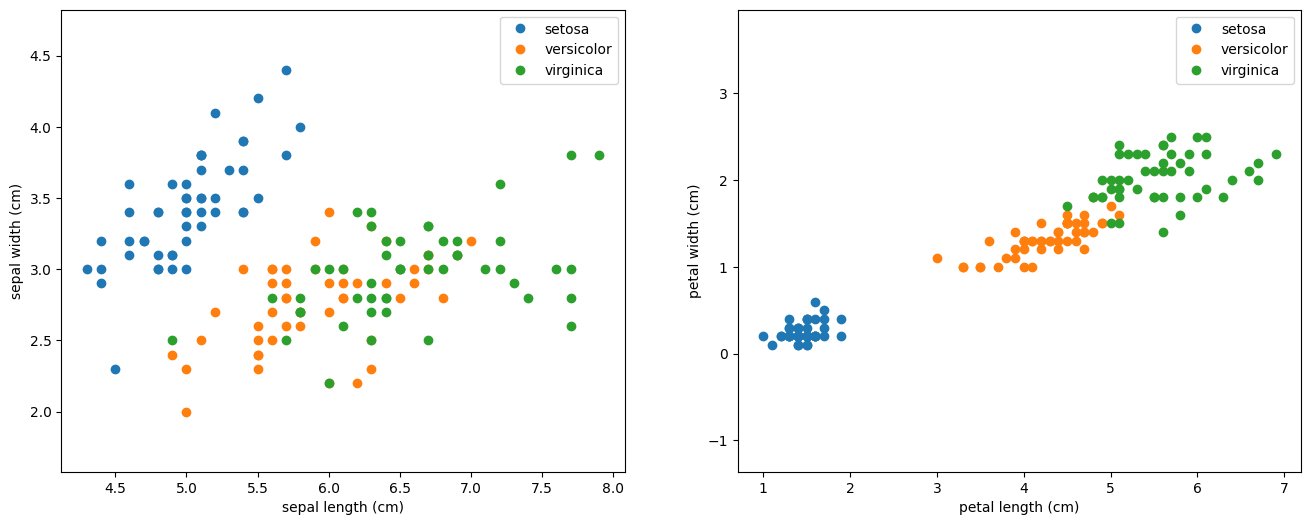

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 266.76it/s]


# Plot training progress

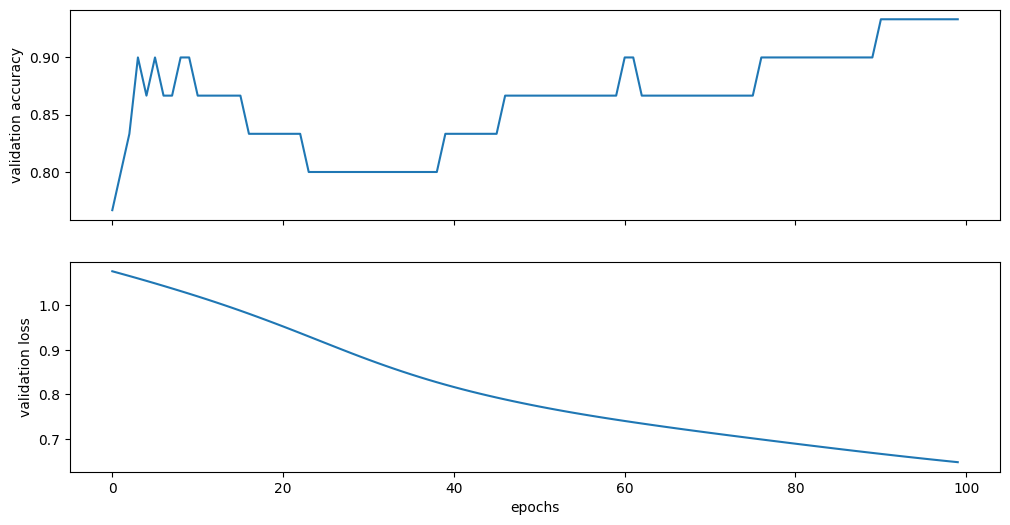

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

#Answer for the Question One
**Changing the number of hidden layers:**

Increasing the number of hidden layers can allow the model to learn more complex representations of the data.

With more hidden layers, the model can capture hierarchical features in the data, potentially improving its ability to generalize to unseen examples.

However, adding more layers also increases the risk of overfitting, especially if the dataset is small or noisy.

In [3]:
from sklearn.neural_network import MLPClassifier

# Define the training data
X = [[-1, -1], [-1, 1], [1, -1], [1, 1]]  # Inputs in -1/+1 logic
Y_and = [-1, -1, -1, 1]  # AND gate labels

# Create MLP classifiers with different numbers of hidden layers
mlp_one_hidden_layer = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='lbfgs')
mlp_two_hidden_layers = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='lbfgs')

# Train the classifiers
mlp_one_hidden_layer.fit(X, Y_and)
mlp_two_hidden_layers.fit(X, Y_and)

# Test the classifiers
print("AND Gate Predictions (One Hidden Layer):", mlp_one_hidden_layer.predict(X))
print("AND Gate Predictions (Two Hidden Layers):", mlp_two_hidden_layers.predict(X))



AND Gate Predictions (One Hidden Layer): [-1 -1 -1  1]
AND Gate Predictions (Two Hidden Layers): [-1 -1 -1  1]


#Answer for the Question Two
**Changing the number of neurons in the hidden layer:**

Increasing the number of neurons in the hidden layer provides the model with more capacity to capture complex relationships in the data.

This can lead to better performance, especially if the problem is highly complex and requires a richer representation.

However, too many neurons can also increase the risk of overfitting, particularly if the dataset is limited.

Conversely, reducing the number of neurons might lead to underfitting, where the model is too simplistic to capture the underlying patterns in the data.


In [4]:
# Create MLP classifiers with different numbers of neurons in the hidden layer
mlp_small_hidden_layer = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', solver='lbfgs')
mlp_large_hidden_layer = MLPClassifier(hidden_layer_sizes=(20,), activation='relu', solver='lbfgs')

# Train the classifiers
mlp_small_hidden_layer.fit(X, Y_and)
mlp_large_hidden_layer.fit(X, Y_and)

# Test the classifiers
print("AND Gate Predictions (Small Hidden Layer):", mlp_small_hidden_layer.predict(X))
print("AND Gate Predictions (Large Hidden Layer):", mlp_large_hidden_layer.predict(X))


AND Gate Predictions (Small Hidden Layer): [-1 -1 -1  1]
AND Gate Predictions (Large Hidden Layer): [-1 -1 -1  1]


#Answer for the Question Three
**Using a different activation function:**

Different activation functions introduce varying degrees of non-linearity into the model, which can impact its ability to learn complex relationships in the data.

ReLU is known for its simplicity and effectiveness, especially in deeper networks. It helps mitigate the vanishing gradient problem and accelerates convergence.

Sigmoid and tanh activations are commonly used in the output layer for binary classification tasks. They squash the output into a specific range, making it interpretable as probabilities.

Choosing the appropriate activation function depends on the characteristics of the problem and the architecture of the neural network.


In [5]:
# Create MLP classifiers with different activation functions
mlp_tanh_activation = MLPClassifier(hidden_layer_sizes=(10,), activation='tanh', solver='lbfgs')
mlp_sigmoid_activation = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='lbfgs')

# Train the classifiers
mlp_tanh_activation.fit(X, Y_and)
mlp_sigmoid_activation.fit(X, Y_and)

# Test the classifiers
print("AND Gate Predictions (Tanh Activation):", mlp_tanh_activation.predict(X))
print("AND Gate Predictions (Sigmoid Activation):", mlp_sigmoid_activation.predict(X))


AND Gate Predictions (Tanh Activation): [-1 -1 -1  1]
AND Gate Predictions (Sigmoid Activation): [-1 -1 -1  1]
